<pre>
<center><b><h1>MLDL - Poject</b></center>
<center><b><h1>Bhatti Mahek</b></center>    
<pre> 

## -> 70000 total values 
## -> data age in days, 
## -> gender 1 - women, 2 - men
## -> height cm , weight Kg
## -> ap_hi - Systolic blood pressure
## -> ap_lo - Diastolic blood pressure
## -> cholesterol - 1: normal, 2: above normal, 3: well above normal
## -> gluc - 1: normal, 2: above normal, 3: well above normal
## -> smoke - whether patient smokes or not

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# import data from dataset

In [2]:
df = pd.read_csv("cardio_train.csv",sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# find the types of field

In [ ]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

# datatypes & non-null count

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


# find count of the null values 

In [ ]:
null_value = df.isnull().sum()
null_value

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
df['age'] = df['age'] / 365
df['age'] = df['age'].astype(int)
df['age']

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int32

In [ ]:
print("No. of patients having minor effects of cholestrol", (df['cholesterol']==(2)).sum())

No. of patients having minor effects of cholestrol 9549


In [ ]:
print("No. of patients having severe effects of cholestrol", (df['cholesterol']==(3)).sum())

No. of patients having severe effects of cholestrol 8066


# find count of smoker

In [ ]:
print("no. of smoker: ",df['smoke'].sum())

no. of smoker:  6169


In [ ]:
df_gender = (df['gender'] == 1).sum()
print("no. of women: ",df_gender)

no. of women:  45530


In [ ]:
df_gender = (df['gender'] == 2).sum()
print("no. of men: ",df_gender)

no. of men:  24470


# Remove Outliers

In [ ]:
df = df[(df['ap_hi'] > 0) & (df['ap_hi'] < 250)]
df = df[(df['ap_lo'] > 0) & (df['ap_lo'] < 200)]
df = df[(df['height'] > 120) & (df['height'] < 220)]
df = df[(df['weight'] > 30) & (df['weight'] < 200)]

# Feature Scaling

In [3]:
df = df.drop(columns=['id'])   
df['age'] = df['age'] / 365

X = df.drop(columns=['cardio']).values
y = df['cardio'].values

X_min = X.min(axis=0)
X_max = X.max(axis=0)

X = (X - X_min) / (X_max - X_min)

# EDA

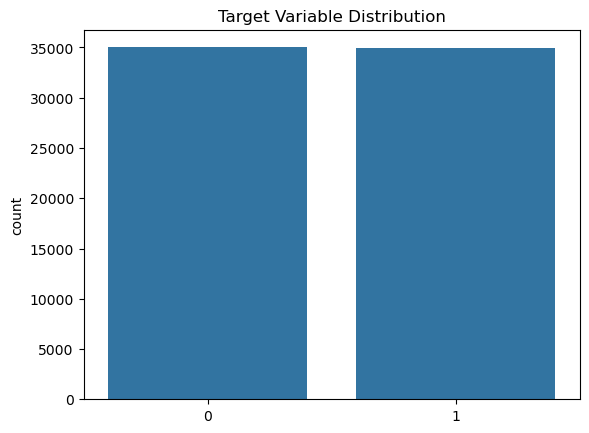

In [ ]:
sb.countplot(x=y)
plt.title("Target Variable Distribution")
plt.show()

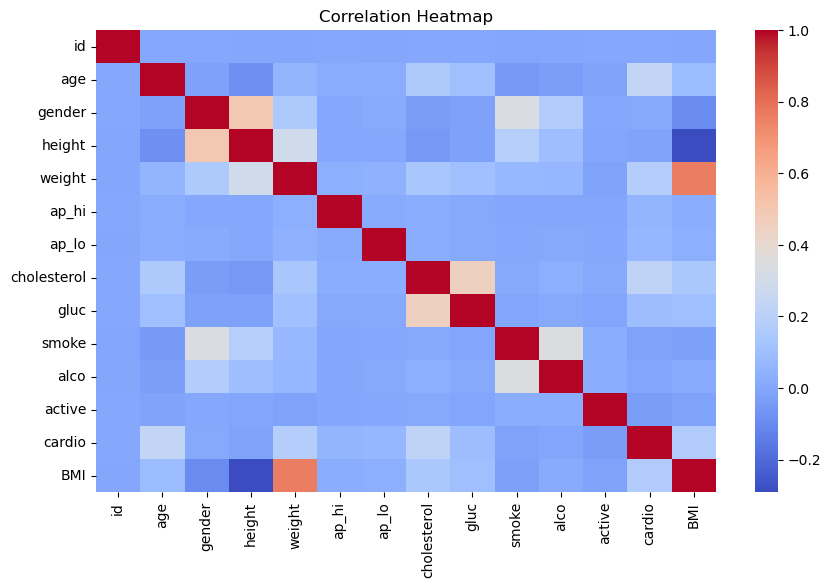

In [ ]:
plt.figure(figsize=(10,6))
sb.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Count of Smokers by Gender

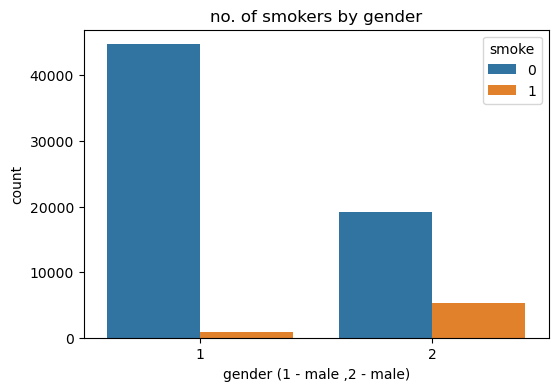

In [ ]:
plt.figure(figsize=(6,4))
sb.countplot(data=df, x='gender', hue='smoke')
plt.title("no. of smokers by gender")
plt.xlabel("gender (1 - male ,2 - male)")
plt.ylabel("count")
plt.show()

# count of people who have heart disease and also smokers

In [ ]:
h_smokers = df[(df['cardio'] == 1) & (df['smoke'] == 1)]
len_smokers = len(h_smokers)
len_smokers

2929

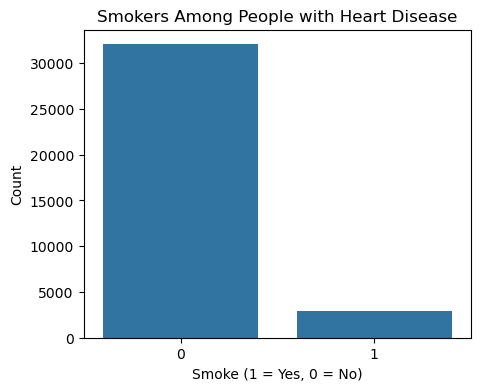

In [ ]:
plt.figure(figsize=(5,4))
sb.countplot(data=df[df['cardio']==1], x='smoke')
plt.title("Smokers Among People with Heart Disease")
plt.xlabel("Smoke (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

# Heatmap of smoke vs cardio

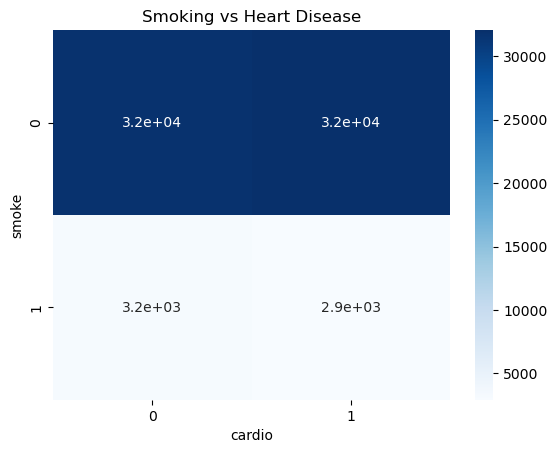

In [ ]:
sb.heatmap(pd.crosstab(df['smoke'], df['cardio']), annot=True, cmap="Blues")
plt.title("Smoking vs Heart Disease")
plt.show()

# BMI difference between smokers & non-smokers

In [ ]:
df["BMI"] = df["weight"] / (df["height"]/100)**2
df.groupby("smoke")["BMI"].mean()

smoke
0    27.608049
1    27.023259
Name: BMI, dtype: float64

# smokers with heart disease : Non-smokers with heart disease

In [ ]:
df[df['cardio']==1].smoke.value_counts(normalize=True)

smoke
0    0.916264
1    0.083736
Name: proportion, dtype: float64

# Age Distribution of Heart Patients

<Axes: title={'center': 'Age Distribution of Heart Patients'}, ylabel='Frequency'>

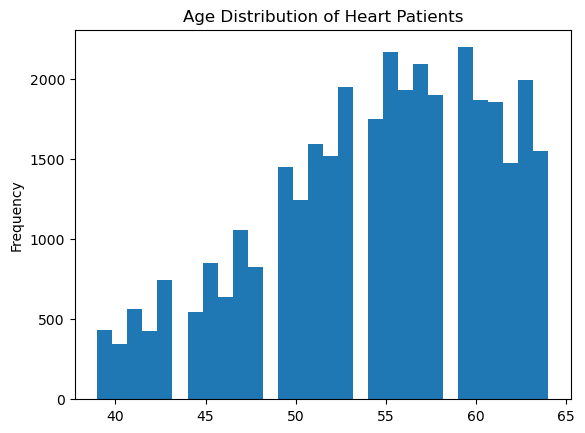

In [ ]:
heart_patients = df[df['cardio'] == 1]

age_data = heart_patients['age']

age_data.plot(kind='hist', bins=30, title='Age Distribution of Heart Patients')

# Distribution of Blood Pressure of Heart Patients

<Axes: >

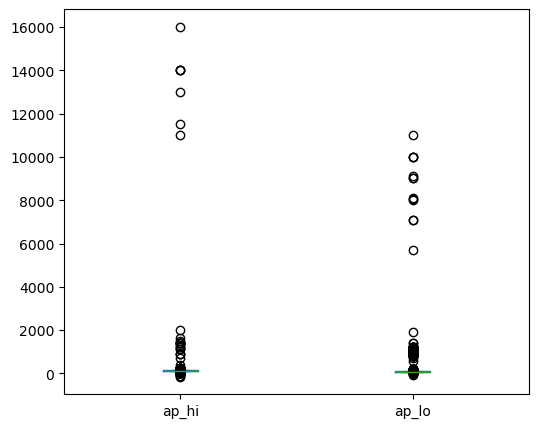

In [ ]:
filter_cardio = df[df['cardio'] == 1]

bp_columns = ['ap_hi', 'ap_lo']

bp_data = filter_cardio[bp_columns]

bp_data.plot(kind='box', figsize=(6, 5))

# Model Creation & Evaluation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0

        for _ in range(self.epochs):
            linear_model = np.dot(X, self.W) + self.b
            y_pred = sigmoid(linear_model)

            dw = (1 / self.m) * np.dot(X.T, (y_pred - y))
            db = (1 / self.m) * np.sum(y_pred - y)

            self.W -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        linear_model = np.dot(X, self.W) + self.b
        y_pred = sigmoid(linear_model)
        return [1 if i >= 0.5 else 0 for i in y_pred]

In [ ]:
model = LogisticRegressionScratch(lr=0.1, epochs=2000)
model.fit(X, y)

In [ ]:
y_pred = model.predict(X_test)
y_pred

[1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,


In [ ]:
predictions = model.predict(X)
accuracy = np.mean(predictions == y)
accuracy

0.6324428571428572

In [ ]:
print(X.shape)
print(X_min.shape)

(70000, 12)
(12,)


In [ ]:
    import pickle
    import os
    
    print("Saving in:", os.getcwd())
    
    with open("cardio_model.pkl", "wb") as f:
        pickle.dump(model, f)
    
    with open("scaler.pkl", "wb") as f:
        pickle.dump((X_min, X_max), f)
    
    print("Files saved successfully!")

Saving in: E:\code sem-6\MLDL\project
Files saved successfully!
